___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import sys 
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [3]:
import os # os: Operating System
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# !pip install tensorflow

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
x_train[0].shape

(28, 28)

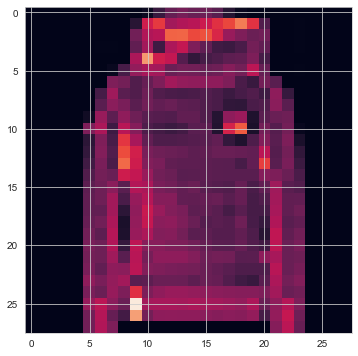

In [9]:
plt.imshow(x_train[54])

In [10]:
y_train[0]

9

In [11]:
classes[0]

'T-shirt/top'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [17]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
from tensorflow.keras.utils import to_categorical 

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_cat_train = to_categorical(y_train)

In [21]:
y_cat_test = to_categorical(y_test)

In [22]:
y_cat_train 

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [25]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),
                 input_shape=(28, 28, 1), 
                 activation='relu',)) 
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

In [26]:
from tensorflow.keras.callbacks import EarlyStopping 

In [27]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3, restore_best_weights=True)

In [28]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1, 
          callbacks = [early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 203s 108ms/step - loss: 0.4126 - accuracy: 0.8596 - val_loss: 0.3244 - val_accuracy: 0.8863
Epoch 2/10
1875/1875 [==============================] - 207s 110ms/step - loss: 0.3035 - accuracy: 0.8949 - val_loss: 0.3082 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 201s 107ms/step - loss: 0.2867 - accuracy: 0.9022 - val_loss: 0.3109 - val_accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2804 - accuracy: 0.9044 - val_loss: 0.3053 - val_accuracy: 0.8954
Epoch 5/10
1875/1875 [==============================] - 196s 104ms/step - loss: 0.2758 - accuracy: 0.9068 - val_loss: 0.3328 - val_accuracy: 0.8971
Epoch 6/10
1875/1875 [==============================] - 197s 105ms/step - loss: 0.2711 - accuracy: 0.9084 - val_loss: 0.3294 - val_accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 197s 105ms/step - loss: 0.2687 - accuracy: 0.9098 - val_

In [29]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.413,0.860,0.324,0.886
1,0.303,0.895,0.308,0.892
2,0.287,0.902,0.311,0.894
3,0.280,0.904,0.305,0.895
4,0.276,0.907,0.333,0.897


**TASK 7: Plot values of metrics you used in your model.**

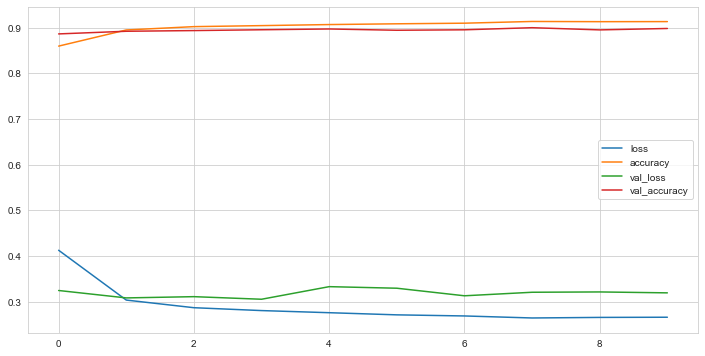

In [30]:
loss_df.plot(figsize = (12,6));

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3193 - accuracy: 0.8982


[0.31926020979881287, 0.8981999754905701]

In [33]:
from sklearn.metrics import classification_report
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 2s 7ms/step


array([[9.6892272e-09, 8.9695931e-11, 1.4722602e-08, ..., 1.4458505e-03,
        4.6132982e-06, 9.9833834e-01],
       [2.6617710e-09, 3.8186428e-34, 1.0000000e+00, ..., 2.5694013e-21,
        4.3833120e-18, 1.8388265e-29],
       [7.4214623e-10, 1.0000000e+00, 1.0732933e-12, ..., 5.5690852e-13,
        6.8701975e-11, 1.4357695e-17],
       ...,
       [4.8296442e-06, 6.3678658e-20, 1.2048757e-08, ..., 1.4666592e-13,
        9.9996006e-01, 5.5050626e-14],
       [2.5104796e-10, 1.0000000e+00, 5.6837586e-13, ..., 2.4558591e-13,
        8.0025803e-10, 1.7224955e-14],
       [1.2482371e-03, 2.1070842e-05, 1.2948167e-02, ..., 5.1080930e-01,
        4.4785984e-02, 2.2500712e-02]], dtype=float32)

In [34]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [35]:
y_cat_test.shape

(10000, 10)

In [36]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.89      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.99      0.95      0.97      1000
           6       0.77      0.66      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [40]:
classes[6]

'Shirt'

## Prediction

In [41]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

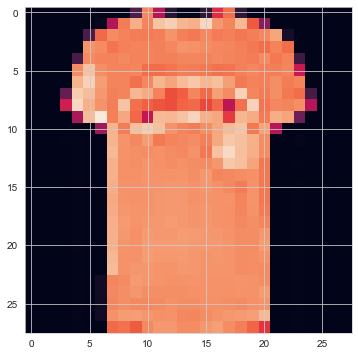

In [42]:
plt.imshow(samples[0])

In [43]:
samples[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.20392157],
        [0.75294118],
        [0.45098039],
        [0.10588235],
        [0.00392157],
        [0.00392157],
        [0.12156863],
        [0.56078431],
        [0.70196078],
        [0.1254902 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01960784],
        [0.44313725],
        [0.7254902 ],
        [0.84705882],
        [0.74509804],
        [0.89803922],
        [0.92941176],
        [0.8627451 ],
        [0.85098039],
        [0.94901961],
        [0.78823529],
        

In [44]:
img=samples[0]
img.shape

(28, 28, 1)

In [45]:
type(img)

numpy.ndarray

In [46]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [47]:
model.predict(resized_img)

1/1 [==============================] - 0s 29ms/step


array([[9.6350670e-01, 2.1581190e-09, 3.8091563e-05, 4.7520782e-05,
        6.1751891e-08, 5.7748839e-10, 3.6406375e-02, 1.0721831e-11,
        1.1492612e-06, 2.3698727e-13]], dtype=float32)

In [48]:
np.argmax(model.predict(resized_img))

1/1 [==============================] - 0s 20ms/step


0

In [49]:
classes[0]

'T-shirt/top'

In [50]:
for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")

1/1 [==============================] - 0s 25ms/step
T-shirt/top   0.964
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.000
Shirt         0.036
Sneaker       0.000
Bag           0.000
Ankle boot    0.000
dtype: float32
1/1 [==============================] - 0s 20ms/step
predicted class is : T-shirt/top

1/1 [==============================] - 0s 18ms/step
T-shirt/top   0.000
Trouser       1.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.000
Shirt         0.000
Sneaker       0.000
Bag           0.000
Ankle boot    0.000
dtype: float32
1/1 [==============================] - 0s 21ms/step
predicted class is : Trouser

1/1 [==============================] - 0s 24ms/step
T-shirt/top   0.000
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.052
Shirt         0.000
Sneaker       0.176
Bag           0.772
Ankle boot    0.000
dtype: float32
1/1 [==========================

(91, 150, 3)


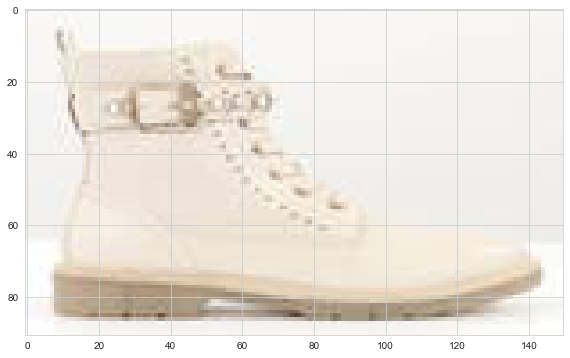

In [51]:
from tensorflow.keras.preprocessing import image
imgGray = image.load_img("test2.jpg",)# target_size=(28, 28))
print (np.array(imgGray).shape)
plt.imshow(imgGray)

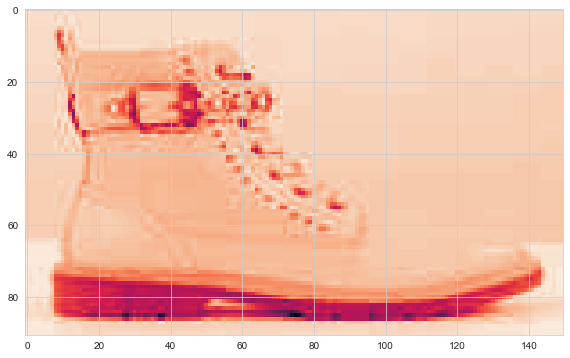

In [52]:
import tensorflow as tf
imgGray = tf.image.rgb_to_grayscale(imgGray)
plt.imshow(imgGray)

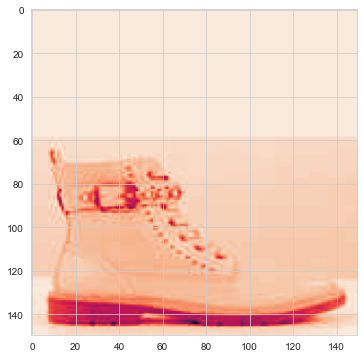

In [53]:
bg_adding = (np.ones(((150-91),150))*255).reshape((150-91),150,1)
plt.imshow(np.concatenate ((bg_adding,imgGray), axis=0)) 
imgGray =  np.concatenate ((bg_adding,imgGray), axis=0)

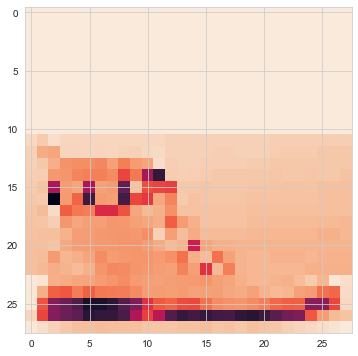

In [54]:
size = (28, 28)
plt.imshow(tf.image.resize(imgGray, size))
imgGray = tf.image.resize(imgGray, size)

In [55]:
imgGray.shape

TensorShape([28, 28, 1])

In [56]:
imgGray = np.array(imgGray)
imgGray.shape

(28, 28, 1)

In [57]:
imgGray[:,:,0]

array([[255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     ],
       [255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     ],
       [255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
        255.     , 255.     , 255.     , 255.     , 255.     , 255.     ,
      

In [58]:
height, width,_ = imgGray.shape

for i in range(height):
    for j in range(width):
        # img[i,j] is the grayscale pixel at position (i, j)
        # check if it's [255] and replace with [0] if so
        if imgGray[i,j] > 250:
            imgGray[i, j] = 0 

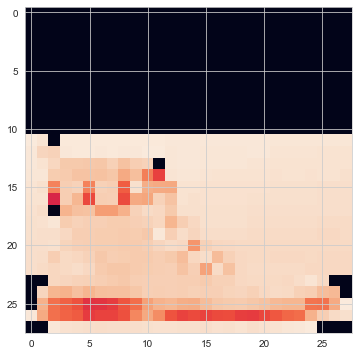

In [59]:
plt.imshow(imgGray)

In [60]:
np.array(imgGray).min(), np.array(imgGray).max()

(0.0, 249.60841)

In [61]:
imgGray = imgGray/255
imgGray.shape

(28, 28, 1)

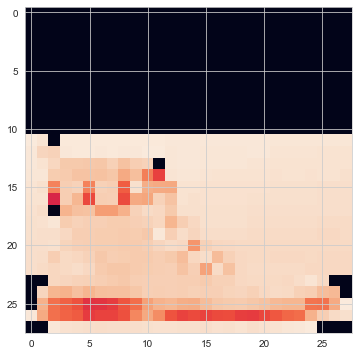

In [62]:
plt.imshow(imgGray)

In [63]:
imgGray= np.expand_dims(imgGray, axis=0)
imgGray.shape

(1, 28, 28, 1)

In [64]:
model.predict(imgGray).round(3).flatten()

1/1 [==============================] - 0s 23ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [65]:
pd.Series(model.predict(imgGray).round(3).flatten())

1/1 [==============================] - 0s 35ms/step


0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
5   0.000
6   0.000
7   0.000
8   1.000
9   0.000
dtype: float32

In [66]:
pd.Series(classes)


0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

(91, 150, 3)


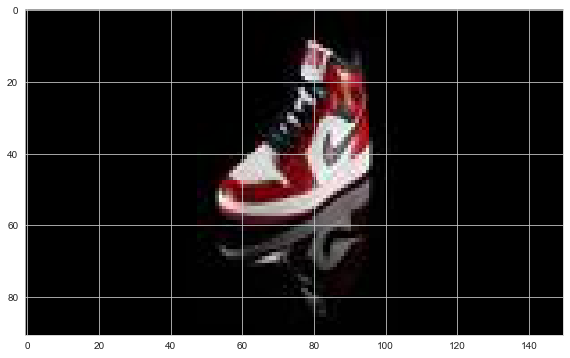

In [68]:
imgGray = image.load_img("s4.jpg",)# target_size=(28, 28))
print (np.array(imgGray).shape)
plt.imshow(imgGray)

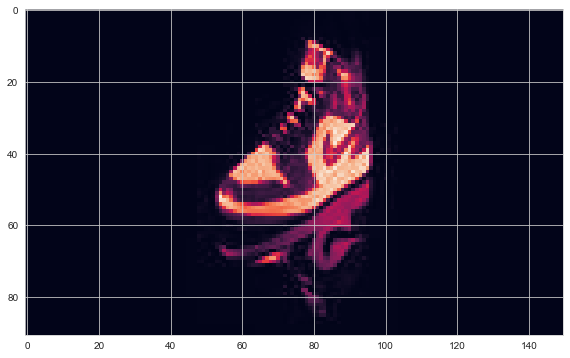

In [69]:
imgGray = tf.image.rgb_to_grayscale(imgGray)
plt.imshow(imgGray)

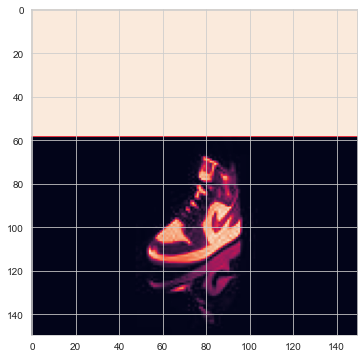

In [70]:
bg_adding = (np.ones(((150-91),150))*255).reshape((150-91),150,1) 
plt.imshow(np.concatenate ((bg_adding,imgGray), axis=0)) 
imgGray =  np.concatenate ((bg_adding,imgGray), axis=0)

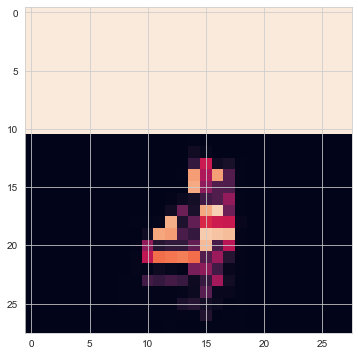

In [71]:
size = (28, 28)
plt.imshow(tf.image.resize(imgGray, size))
imgGray = tf.image.resize(imgGray, size)

In [72]:
imgGray.shape

TensorShape([28, 28, 1])

In [73]:
imgGray = np.array(imgGray)
imgGray.shape

(28, 28, 1)

In [74]:
imgGray[:,:,0]

array([[2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
       [2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
        2.55000000e+02, 2.55000000e+02, 2.55000000e+02, 2.55000

In [75]:
height, width,_ = imgGray.shape

for i in range(height):
    for j in range(width):
        # img[i,j] is the grayscale pixel at position (i, j)
        # check if it's [255] and replace with [0] if so
        if imgGray[i,j] > 250:
            imgGray[i, j] = 0 

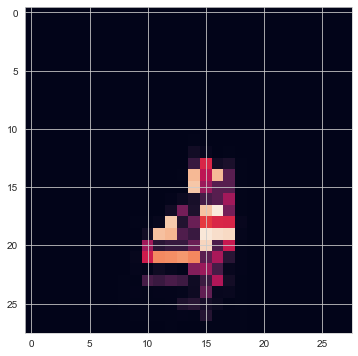

In [76]:
plt.imshow(imgGray)


In [77]:
np.array(imgGray).min(), np.array(imgGray).max()

(0.0, 236.09825)

In [78]:
imgGray = imgGray/255 
imgGray.shape

(28, 28, 1)

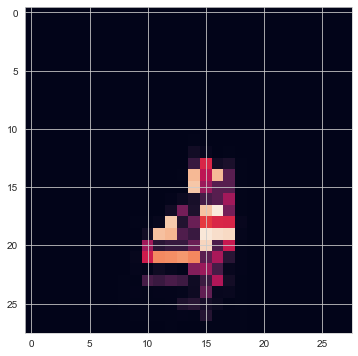

In [79]:
plt.imshow(imgGray)

In [80]:
imgGray= np.expand_dims(imgGray, axis=0)
imgGray.shape

(1, 28, 28, 1)

In [81]:
model.predict(imgGray).round(3).flatten()

1/1 [==============================] - 0s 60ms/step


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.983, 0.   , 0.   , 0.017,
       0.   ], dtype=float32)

In [82]:
pd.Series(model.predict(imgGray).round(3).flatten())

1/1 [==============================] - 0s 39ms/step


0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
5   0.983
6   0.000
7   0.000
8   0.017
9   0.000
dtype: float32

In [83]:
pd.Series(classes)

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___